Features examples
   alcohol  malic_acid
0    14.23        1.71
1    13.20        1.78
2    13.16        2.36
3    14.37        1.95
4    13.24        2.59


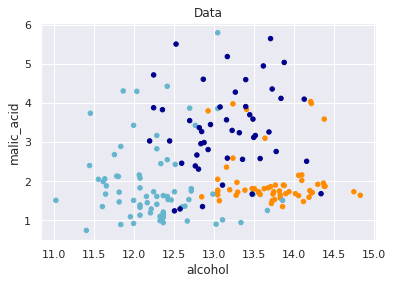

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine

data = load_wine()

X = data.data[:, :2]
y = data.target
m = len(y)
x_names = data.feature_names[:2]
y_names = data.target_names

X_df = pd.DataFrame(X, columns = x_names)

print("Features examples")
print(X_df.head())

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.title("Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

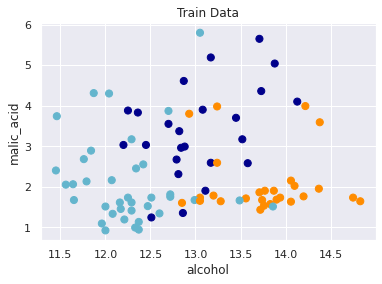

In [2]:
from sklearn.model_selection import train_test_split

#Split into train, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.29, random_state=42)

m_train = len(y_train)
m_val = len(y_val)
m_test = len(y_test)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=50)
plt.title("Train Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#Model training and evaluation for each K

K_values = [1, 3, 5, 7]
models = []
scores = []

for i in range(len(K_values)):
  models.append(make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors = K_values[i])))
  models[i].fit(X_train, y_train)
  scores.append(models[i].score(X_val, y_val))
  print("K: {} - score: {}".format(K_values[i], scores[i]))

K: 1 - score: 0.7777777777777778
K: 3 - score: 0.8611111111111112
K: 5 - score: 0.9166666666666666
K: 7 - score: 0.8888888888888888


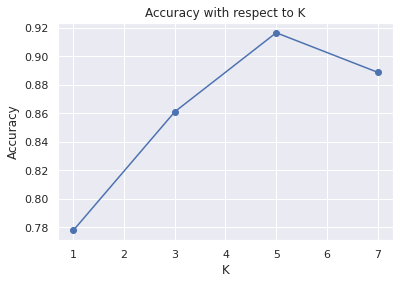

In [4]:
# Results inspections - K
plt.figure()
plt.plot(K_values, scores, marker="o")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect to K")
plt.show()

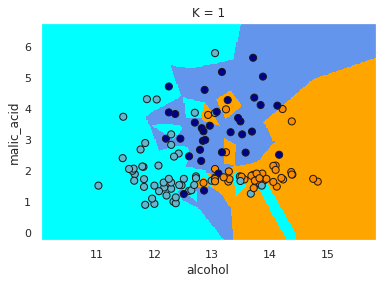

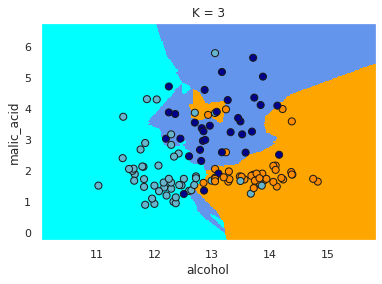

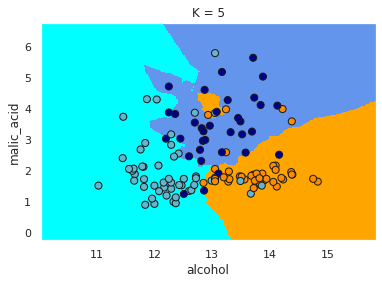

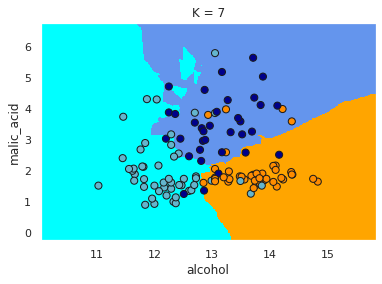

In [5]:
# Results inspections - KNN

# Color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i in range(len(K_values)):
  Z = models[i].predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X_train_val[:, 0], X_train_val[:, 1], c=y_train_val, cmap=cmap_bold, edgecolor='k', s=50)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(x_names[0])
  plt.ylabel(x_names[1])
  plt.title("K = {}".format(K_values[i]))
plt.show()

In [6]:
# Model Evaluation with best K

K = K_values[scores.index(max(scores))]

best_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors = K))
best_knn.fit(X_train_val, y_train_val)
acc = best_knn.score(X_test, y_test)
print("Best K: {} - accuracy: {:.2f}%".format(K, acc*100))

Best K: 5 - accuracy: 75.93%
